In [1]:
#importing libraries  

from qiskit import QuantumCircuit 
from qiskit import transpile
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService
#from qiskit.circuit.library import MCMT
from qiskit.visualization import plot_distribution
#from qiskit.circuit.library import Diagonal
#from qiskit.circuit.library import RGQFTMultiplier
#from qiskit.circuit.library import Permutation
from qiskit.circuit.library import QFT

#import numpy as np

In [2]:
#Defining backend and sampler

backend_aer = AerSimulator()
sampler_aer = SamplerV2(backend_aer)


QFT = Quantum Fourier Transform

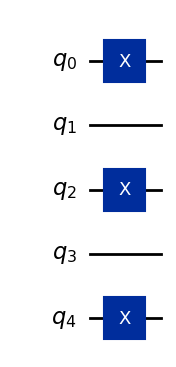

In [3]:
#initializing  quantum circuit
qc = QuantumCircuit(5)   #N = 5 qubits. N=5 classical bits

#building the circuito

#Apply X to q4, q2 e q0

qc.x(4)
qc.x(2)
qc.x(0)

qc.draw("mpl")


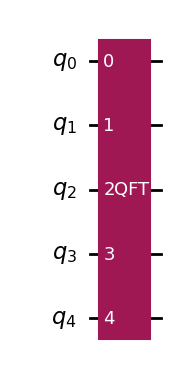

In [4]:
#Lets apply QFT function in the circuit

qft = QFT(num_qubits = 5, approximation_degree = 0, do_swaps = True, inverse = False, insert_barriers = False, name = 'QFT')

qft.draw("mpl")

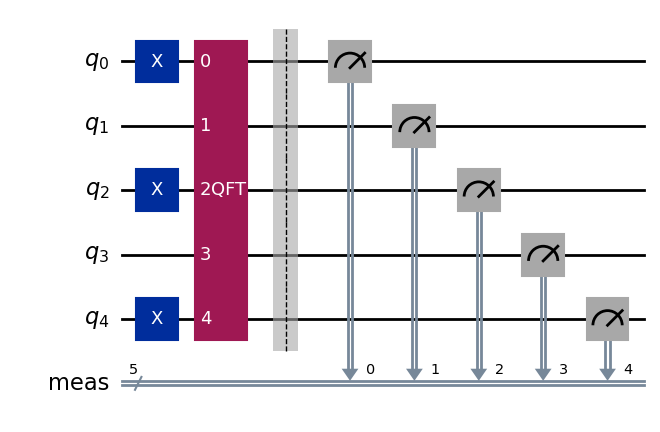

In [5]:

#Adding qc and qft

qc = qc.compose(qft)

#meassuring all

qc.measure_all()

#printing...


qc.draw("mpl")




#Execute o circuito acima para o backend pre-definido por 1000 vezes

#job = execute(circuit, backend, shots=1000)

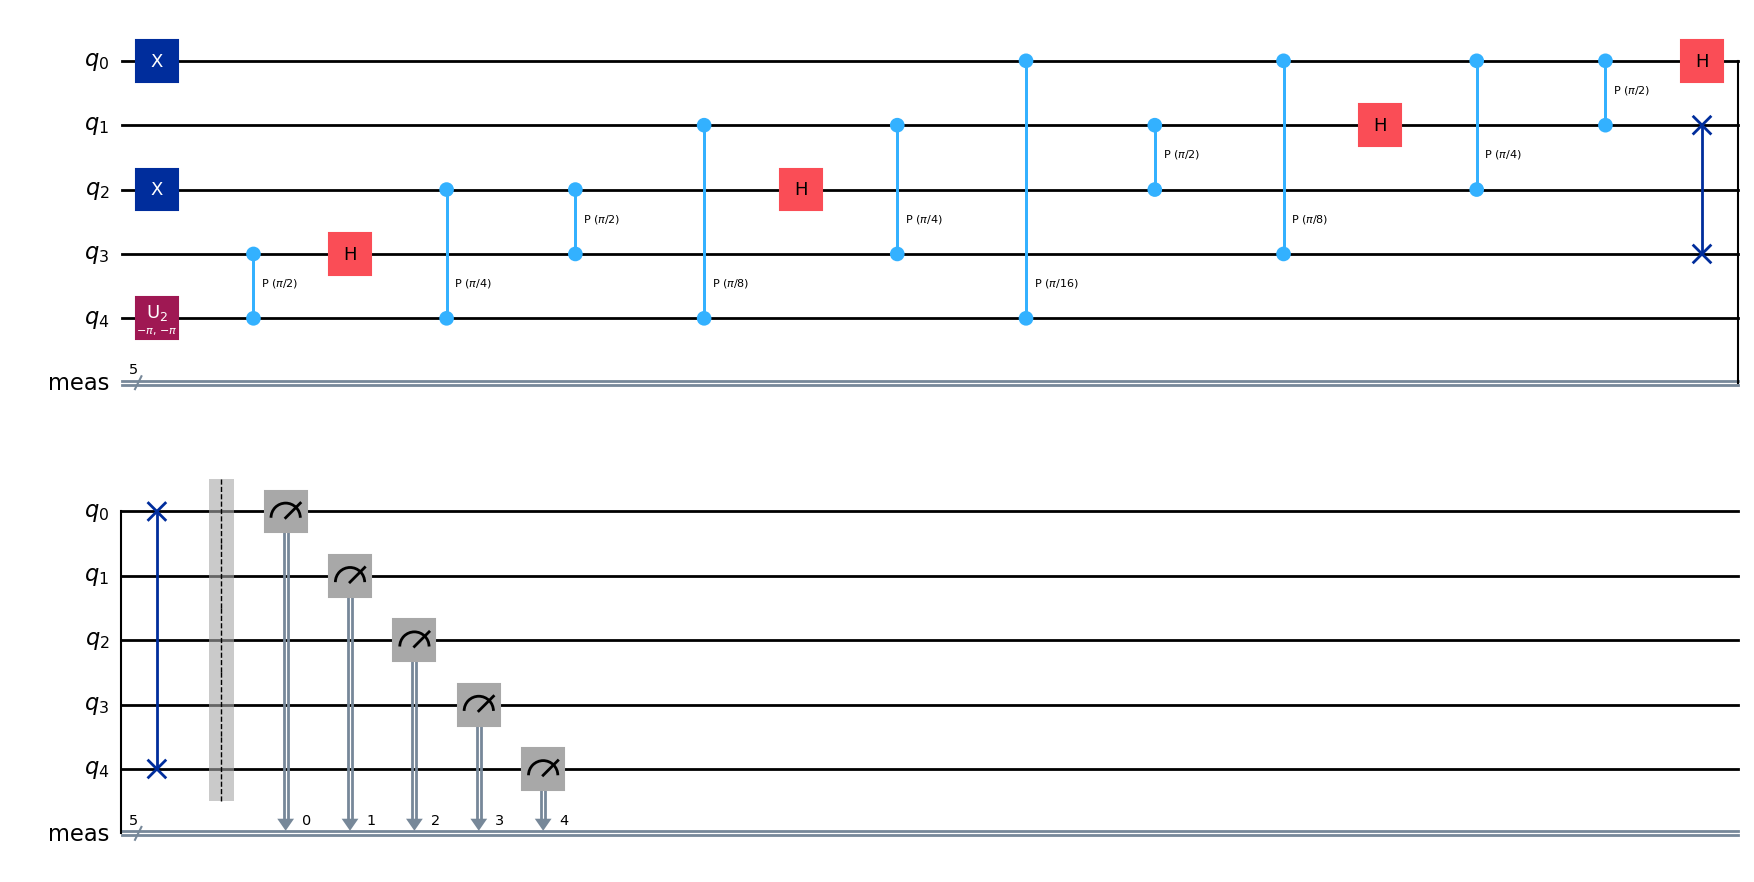

In [6]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct = transpile(qc,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct.draw("mpl")

In [7]:
job_aer = sampler_aer.run([(qct, None, 1000)]) # running the transpiled circuit 1000 times

result = job_aer.result() #Getting the results   

counts = result[0].data.meas.get_counts() #Meassuring results. According to the circuit we measure 'meas'
#counts
print('RESULT ', counts)


RESULT  {'10111': 26, '10011': 40, '11111': 43, '00001': 24, '10100': 26, '00100': 38, '00110': 33, '01011': 34, '01000': 20, '01111': 40, '11001': 32, '01101': 27, '00011': 30, '10010': 27, '01010': 31, '00000': 37, '10101': 26, '00101': 25, '10000': 27, '00010': 42, '01100': 32, '11110': 25, '11010': 31, '11000': 40, '10001': 32, '01110': 32, '10110': 27, '01001': 27, '11011': 28, '00111': 32, '11100': 36, '11101': 30}


QFT output 
-------------



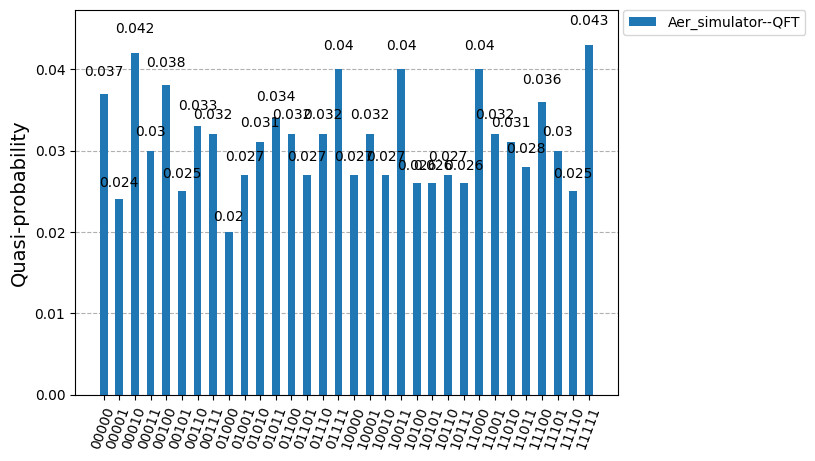

In [8]:
print('QFT output ')
print('-------------\n')
#print(counts)

plot_distribution([counts], legend = ['Aer_simulator--QFT'])

QFT Inverse

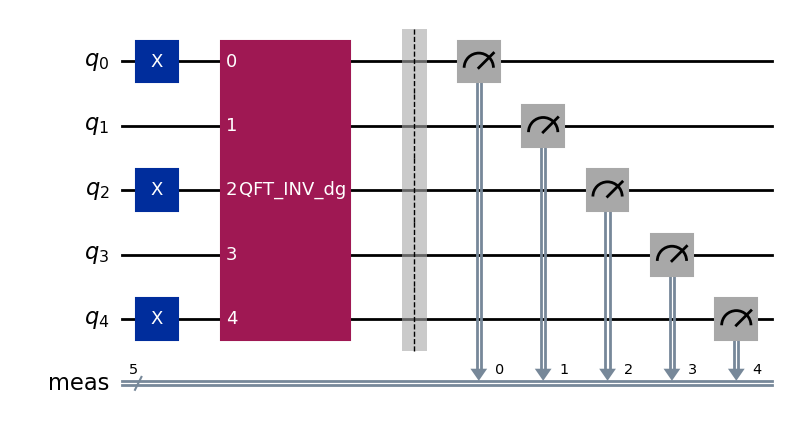

In [9]:
#restarting the circuit

qc1 = QuantumCircuit(5)

#bulding the  circuit again

#Apply X in q4, q2, q0

qc1.x(4)
qc1.x(2)
qc1.x(0)

#Apply QFT in the circuit

#qc1 = qc1.compose(QFT(num_qubits=5, approximation_degree=0, do_swaps=True, inverse=False, insert_barriers = True, name = 'qft'))

#Apply the QFT inverse in the circuit

qc1 = qc1.compose(QFT(num_qubits=5, approximation_degree=0, do_swaps=True, inverse=True, insert_barriers=True, name='QFT_INV'))

#Messure the qubits

qc1.measure_all()

#printing

qc1.draw("mpl")
#print(circuit)

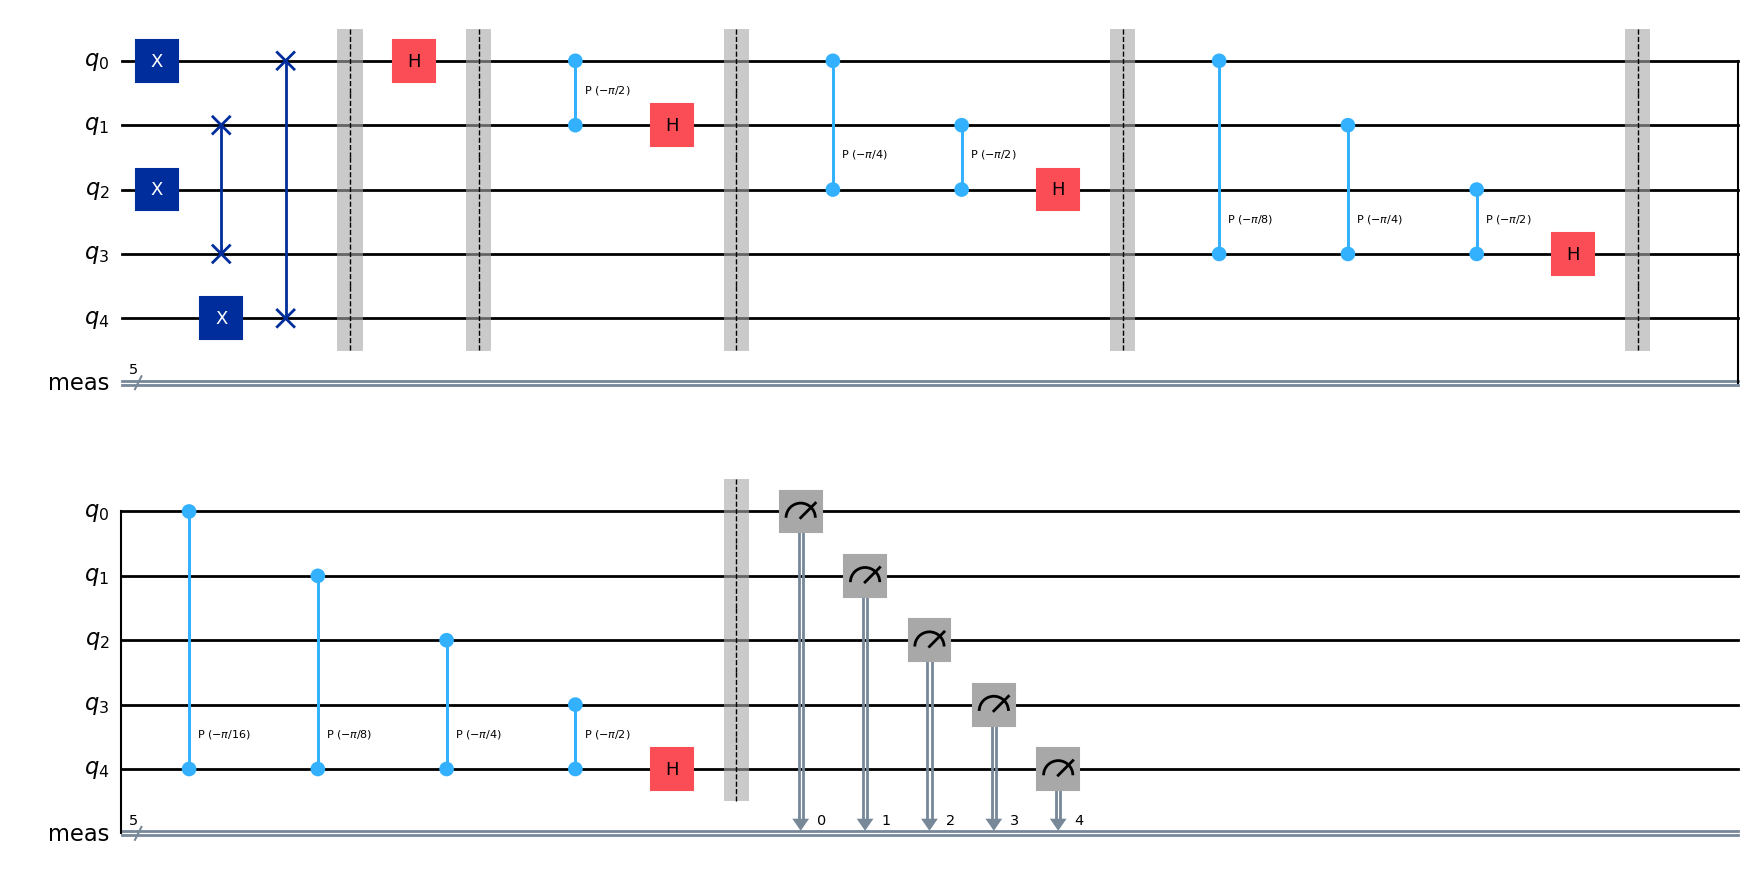

In [10]:
#Transpiling the circuit, it is needed if we want to send to a real QC

qct1 = transpile(qc1,backend = backend_aer) 

#Drawing the trasnpiled circuit
qct1.draw("mpl")



#execute o circuito acima para o backend previou por 1000 vezes

#j0b = execute(circuit, backend, shots =1000)

In [11]:
job_aer1 = sampler_aer.run([(qct1, None, 1000)]) # running the transpiled circuit 1000 times

result1 = job_aer1.result() #Getting the results   

counts1 = result1[0].data.meas.get_counts() #Meassuring results. 
#counts
print('RESULT ', counts1)


RESULT  {'10110': 31, '00000': 28, '01011': 28, '01000': 32, '00100': 31, '01101': 46, '11100': 44, '11101': 38, '01111': 29, '11011': 34, '11111': 30, '11001': 25, '01010': 35, '00101': 36, '00110': 37, '10001': 31, '10111': 33, '11010': 34, '10101': 31, '10100': 23, '00111': 16, '01110': 34, '10011': 30, '10000': 29, '00011': 33, '01100': 29, '01001': 31, '00010': 34, '10010': 30, '00001': 19, '11110': 29, '11000': 30}


inverse QFT output
------------------



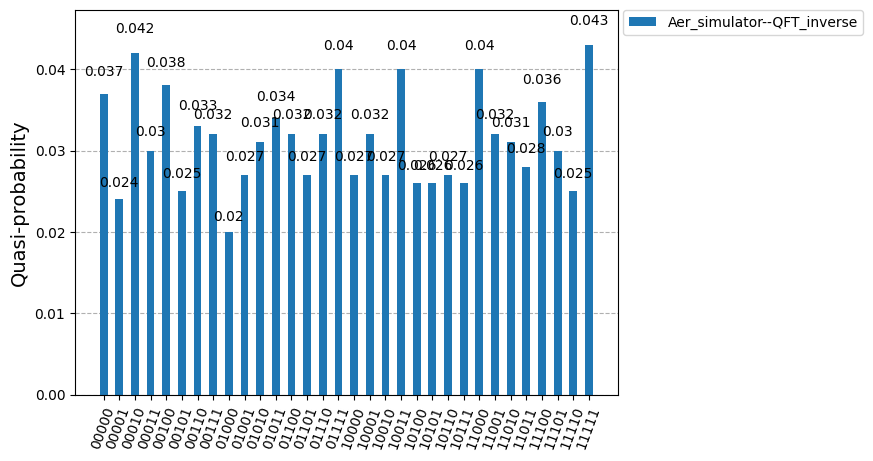

In [12]:

print('inverse QFT output')
print('------------------\n')
#print(counts)

plot_distribution([counts], legend = ['Aer_simulator--QFT_inverse'])